In [1]:
# add simpegseisc directory to path
import os
if '..' not in os.sys.path:
    os.sys.path.append('..')

In [2]:
from simpegseis import *
%pylab inline
from SimPEG.Utils import mkvc

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
# Step1: set time
dt = 0.8e-4
ntime = 1700
time = np.arange(ntime)*dt
# Step4: set mesh
cs = 0.5
cs = 0.5
hx = np.ones(500.)*cs
hy = np.ones(200.)*cs
mesh = Mesh.TensorMesh([hx, hy], 'CC')
# Step2: set Tx and Rx
tlag = 0.008
options={'tlag':tlag, 'fmain':100.} # You need to set waveform to set Tx
nrx = 99
xtemp_rx = np.arange(nrx)*2.5+2.5+mesh.vectorCCx.min()
xy_rx = np.c_[xtemp_rx, np.ones(nrx)*mesh.vectorCCy.max()]
rx = AcousticRx(xy_rx)

tx = AcousticSrc(np.r_[mesh.vectorCCx.min(), mesh.vectorCCy.max()], time, [rx], **options)
# Step3: set survey (pass txlist)
survey = SurveyAcoustic([tx])
wave = tx.RickerWavelet()
# Step5: set problem (pass mesh) and pair with survey
prob = AcousticProblemPML(mesh)
prob.pair(survey)
# Step6: set boundary
prob.setPMLBC(20, dt, bcflag='left', const=1.)
prob.storefield = True
# Step7: set velocity model and check stability
v = np.ones(mesh.nC)*800.
v[mesh.gridCC[:,1]<30.] = 2300.
v[mesh.gridCC[:,1]<0.] = 1500.
prob.stabilitycheck(v, time, 100.)

You are good to go:)
>> Stability information
   dt: 8.00e-05 s
   Optimal dt: 1.09e-04 s
   Cell per wavelength (G): 1.60e+01
   Optimal G: 1.60e+01


(<matplotlib.collections.QuadMesh at 0x7f6194b9da90>,)

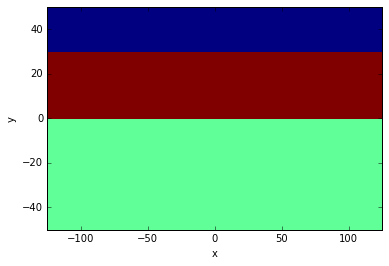

In [15]:
mesh.plotImage(v)

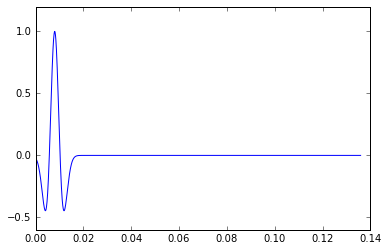

In [16]:
plt.plot(time, wave)

In [17]:
# Step8: run forward
U = prob.fields(v)

>> Start Computing Acoustic Wave
>> dt: 8.00e-05 s
>> Optimal dt: 1.09e-04 s
>> Main frequency, fmain: 1.00e+02 Hz
>> Cell per wavelength (G): 1.60e+01
  Src at (-124.75, -124.75):    1/   1
>>Elapsed time: 4.35e+01 s


In [18]:
# Step9: project data
data = survey.projectFields(U)

In [19]:
print 50./1500.

0.0333333333333


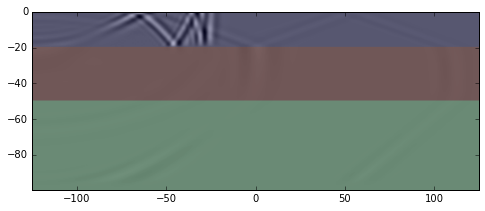

In [20]:
icount = 1699
fig, ax = plt.subplots(1,1, figsize = (8, 5))
extent = [mesh.vectorCCx.min(), mesh.vectorCCx.max(), mesh.vectorCCy.min()-mesh.vectorCCy.max(), mesh.vectorCCy.max()-mesh.vectorCCy.max()]
ax.imshow(np.flipud(U[0][:,icount].reshape((mesh.nCx, mesh.nCy), order = 'F').T), cmap = 'binary', extent=extent)  
ax.imshow(np.flipud(v.reshape((mesh.nCx, mesh.nCy), order = 'F').T), cmap = 'jet', extent=extent, alpha = 0.2)  

In [21]:
print data[0].shape

(99, 1700)



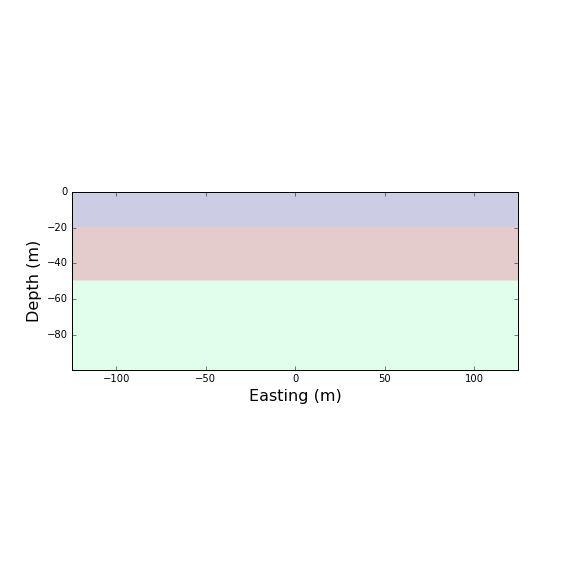
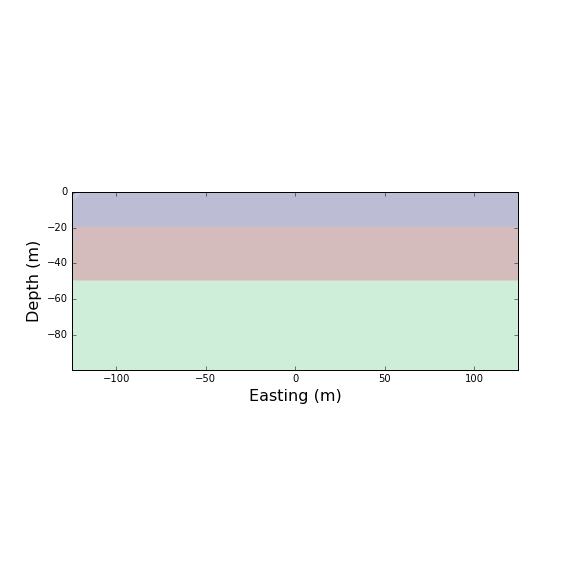
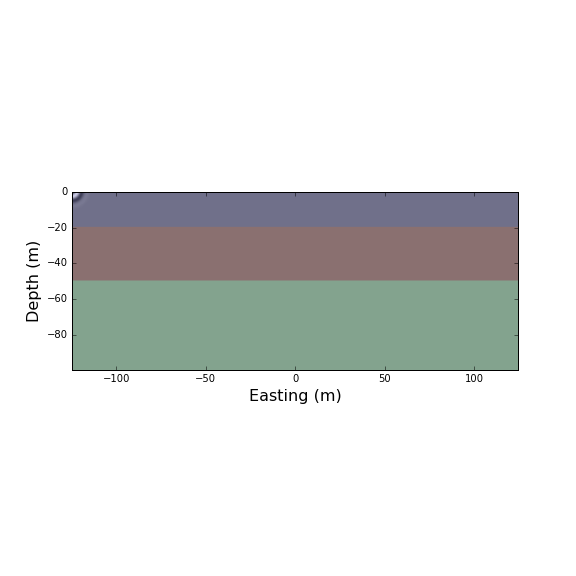
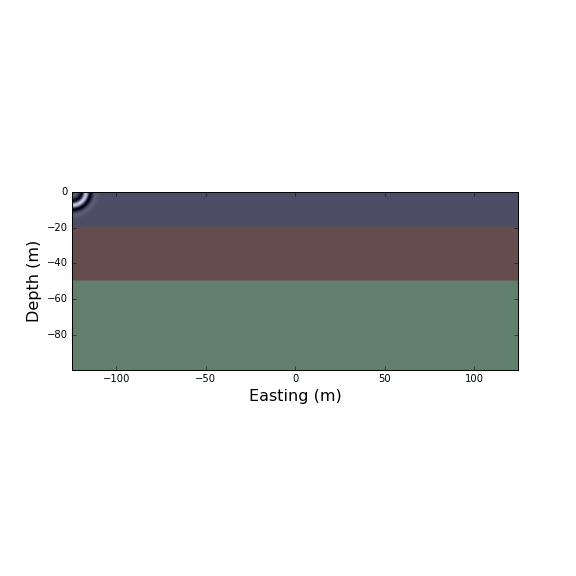
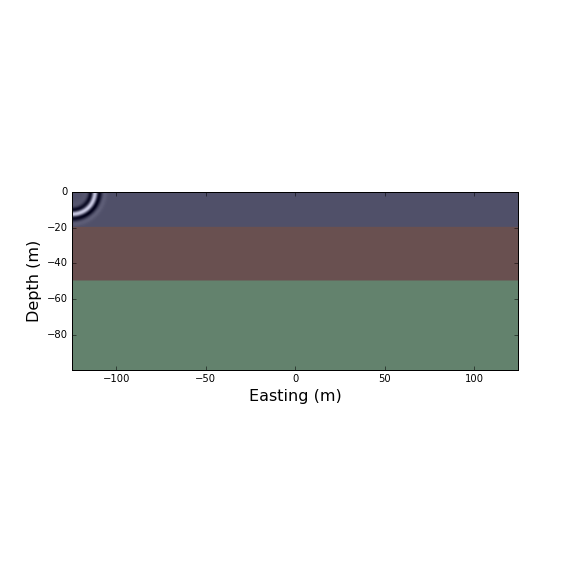
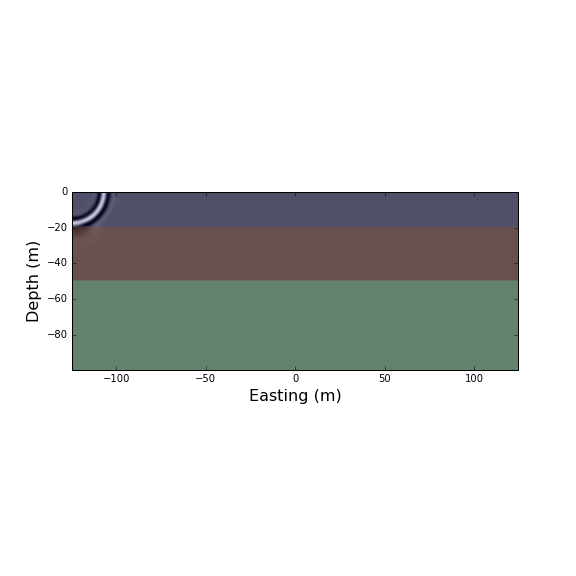
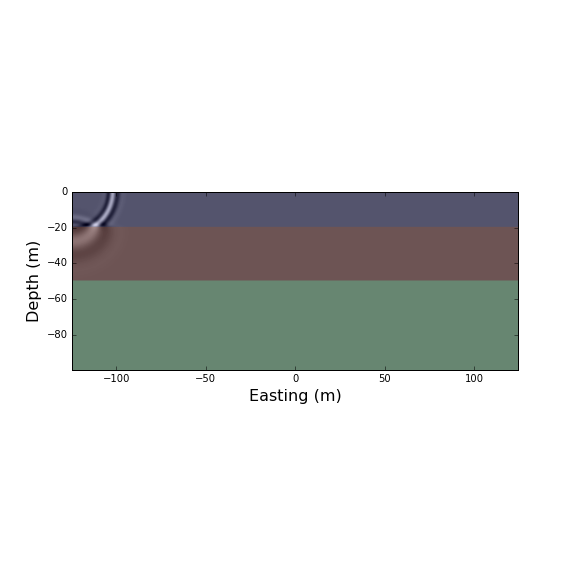
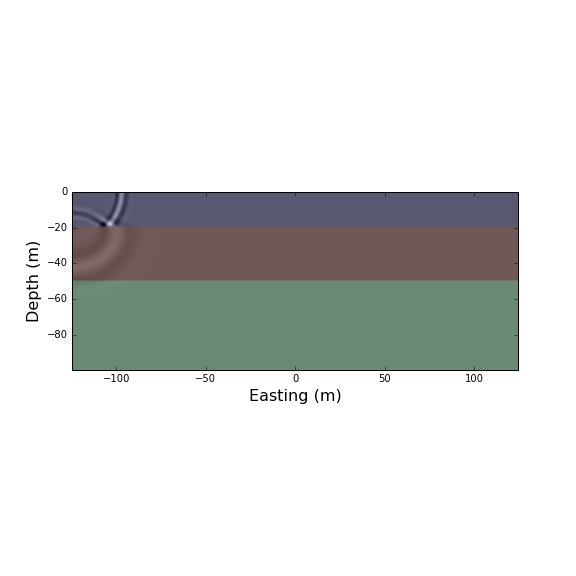
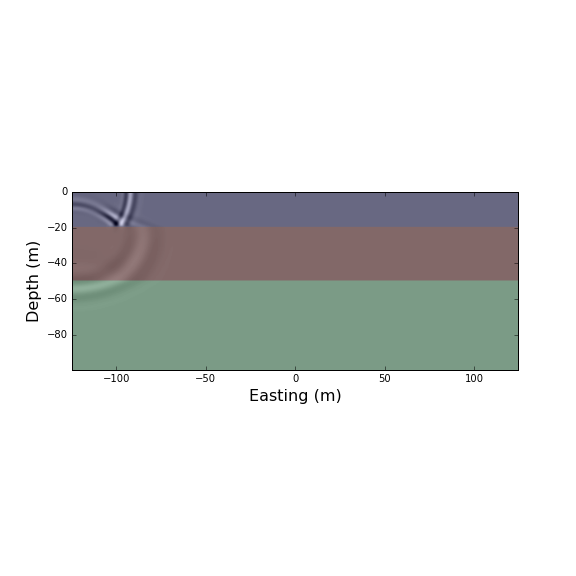
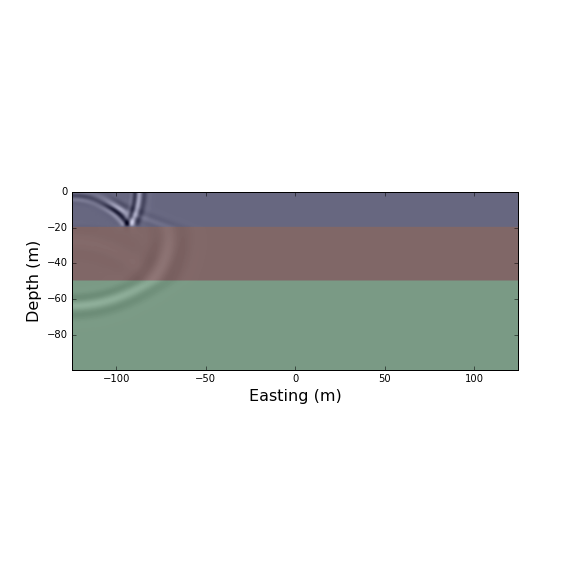
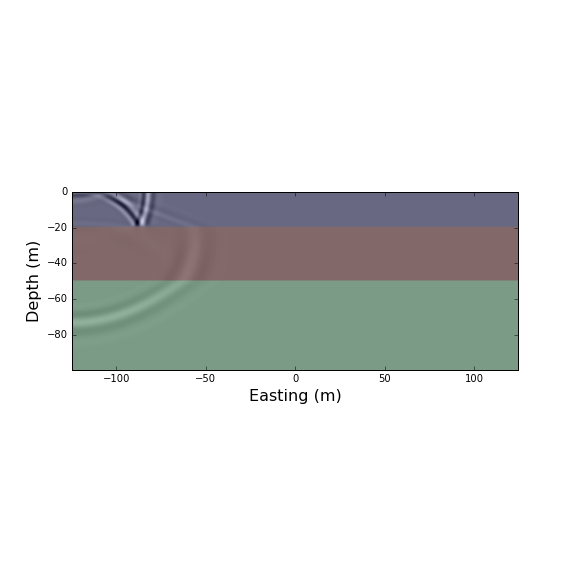
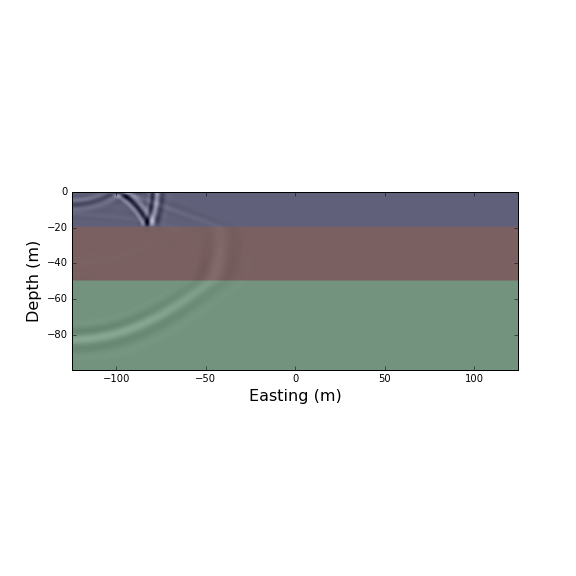
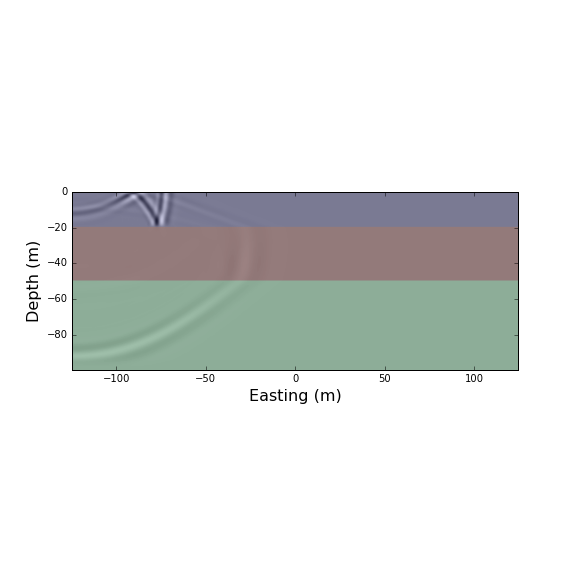
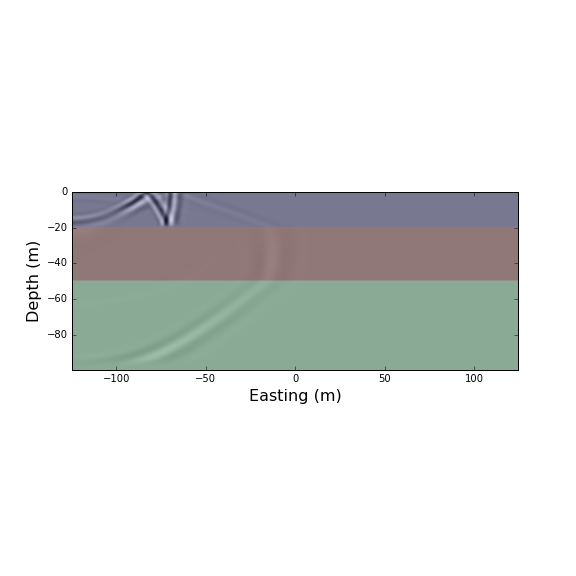
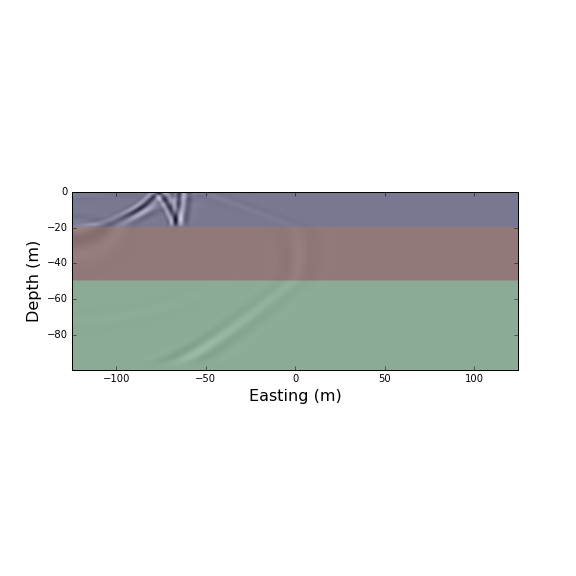
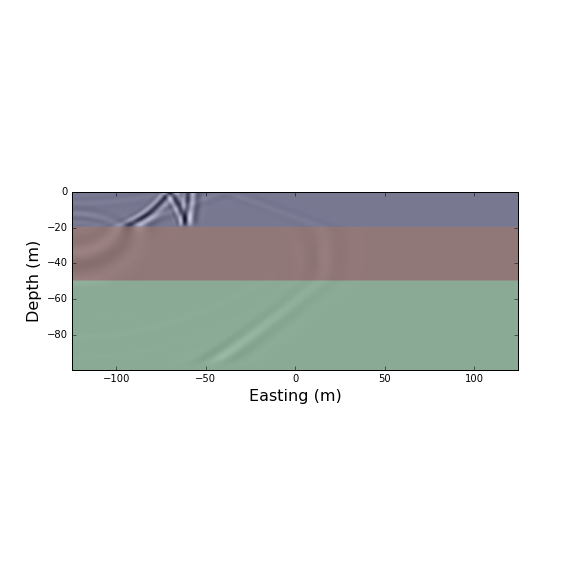
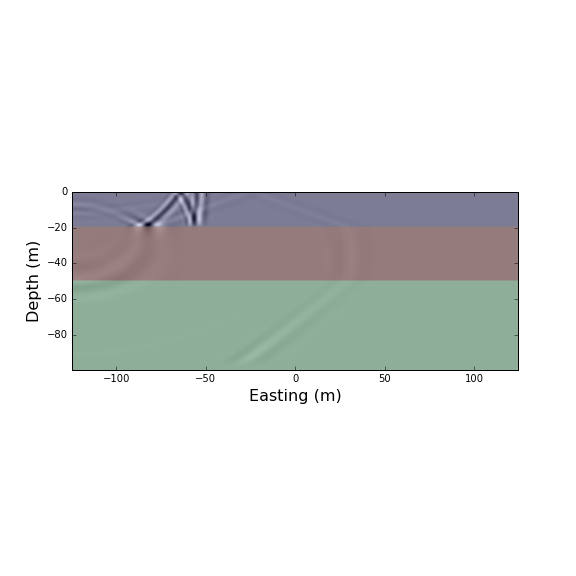
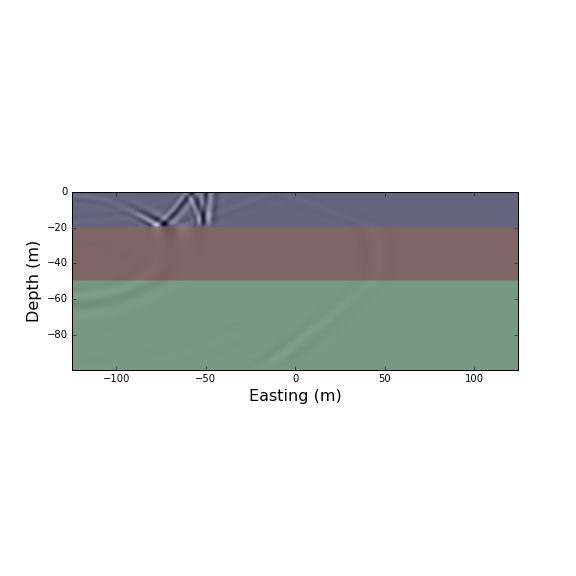
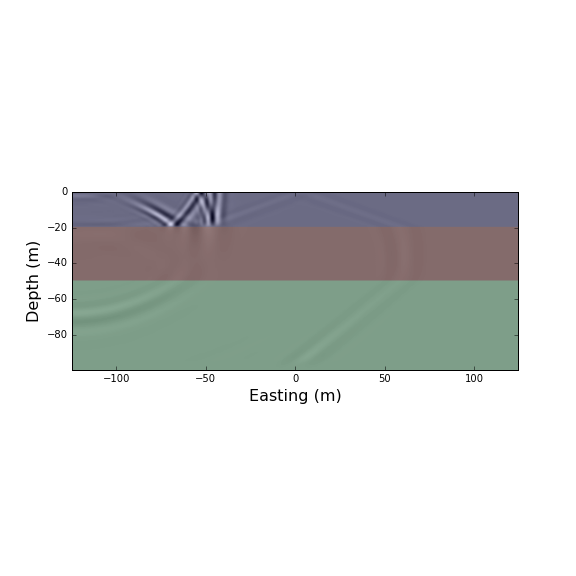
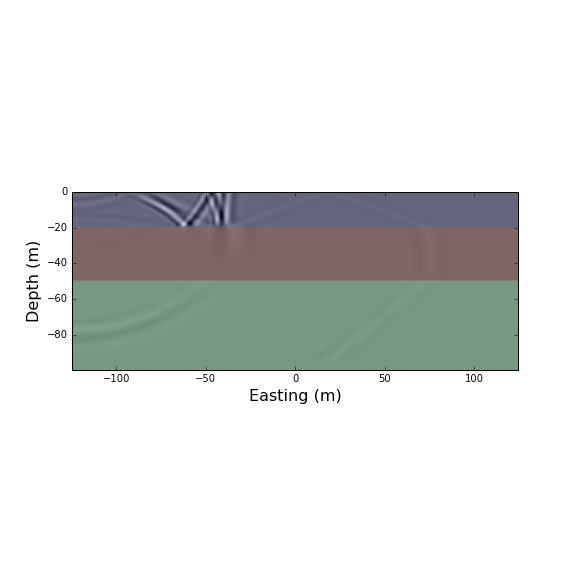

In [30]:
from JSAnimation import IPython_display
from matplotlib import animation
fig, ax = plt.subplots(1,1, figsize = (8, 8))
ax.set_xlabel('Easting (m)', fontsize = 16)
ax.set_ylabel('Depth (m)', fontsize = 16)
extent = [mesh.vectorCCx.min(), mesh.vectorCCx.max(), mesh.vectorCCy.min()-mesh.vectorCCy.max(), mesh.vectorCCy.max()-mesh.vectorCCy.max()]
ax.set_xlim(extent[:2])
ax.set_ylim(extent[2:])

nskip = 79
def animate(i_id):
    icount = i_id*nskip
    frame = ax.imshow(np.flipud(U[0][:,icount].reshape((mesh.nCx, mesh.nCy), order = 'F').T), cmap = 'binary', extent=extent)    
    ax.imshow(np.flipud(v.reshape((mesh.nCx, mesh.nCy), order = 'F').T), cmap = 'jet', extent=extent, alpha = 0.2)  
    return frame
animation.FuncAnimation(fig, animate, frames=20, interval=40, blit=False)

In [23]:
def traveltime(x, h, v):
    d = np.sqrt((0.5*x)**2+h**2)
    t = 2*(d/v)
    return t

In [24]:
print traveltime(2.5, 20., 800.)

0.0500975610684


In [25]:
def intercTime(x, h, v1, v2):
    out = 2*h*np.sqrt(v2**2-v1**2)/(v1*v2)

In [26]:
# print intercTime(0., 20., 800.)

In [27]:
print (2*20)/800.

0.05


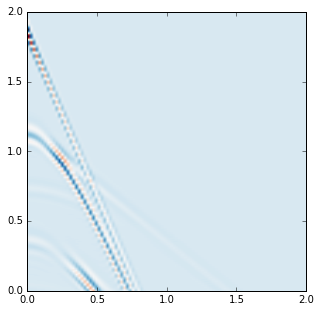

In [28]:
extent = [0,2, 0, 2]
fig, ax = plt.subplots(1,1, figsize = (8, 5))
ax.imshow(data[0].T, cmap = 'RdBu', extent=extent)  

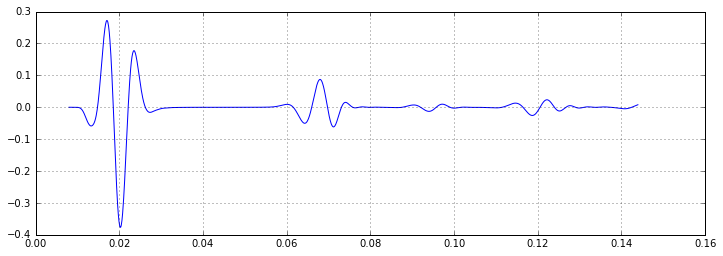

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
ax.plot(time+tlag, data[0][0,:])
ax.grid(True)